<a href="https://colab.research.google.com/github/serenabooth/Scaffolding_RL/blob/master/RL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb ffmpeg xorg-dev python-opengl libboost-all-dev libsdl2-dev swig
!apt-get install python-opengl -y

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Get:13 https://developer.download.nvidia.com/com

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from google.colab import files
import pickle
import random
import seaborn
import itertools

In [3]:
# mount Google drive - to store model checkpoints, etc
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def load_all_models(files):
    all_reward_histories = []
    all_base_shot_histories = []
    
    for file in files: 
        rewards_history_verbose = pickle.load( open( file + "_rewards_vb", "rb" ) )
        base_verbose =  pickle.load( open( file + "_base_verbose", "rb" ) )
        
        all_reward_histories.append(rewards_history_verbose[0:50])
        all_base_shot_histories.append(base_verbose[0:50])
       
    data_rewards = []
    data_baseshots = []
    for i in range(0,5):
        for j in range(0,50):
            for k in range(0,5):
              data_rewards.append([j,all_reward_histories[i][j][k]])
              data_baseshots.append([j,all_base_shot_histories[i][j][k] * 100])
        
                
    df_all_rewards = pd.DataFrame(data=data_rewards, columns=['Epoch','Score'])
    df_base_shots = pd.DataFrame(data=data_baseshots, columns=['Epoch', 'Base Hit Rate (%)'])
    return (df_all_rewards, df_base_shots)

df_all_rewards, df_base_shots = load_all_models(
                      [F"/content/gdrive/My Drive/RL_models/Final_Models_for_graphs/" + "Without_scaffolding_1/2019-05-09-ae291d26-72af-11e9-bad0-0242ac1c0002",
                       F"/content/gdrive/My Drive/RL_models/Final_Models_for_graphs/" + "Without_scaffolding_2/2019-05-10-eaf667c6-72d3-11e9-8be6-0242ac1c0002",
                       F"/content/gdrive/My Drive/RL_models/Final_Models_for_graphs/" + "Without_scaffolding_3/2019-05-10-4db2117a-7334-11e9-bfa9-0242ac1c0002",
                       F"/content/gdrive/My Drive/RL_models/Final_Models_for_graphs/" + "Without_scaffolding_4/2019-05-10-722e73ee-734e-11e9-bfa9-0242ac1c0002",
                       F"/content/gdrive/My Drive/RL_models/Final_Models_for_graphs/" + "Without_scaffolding_5/2019-05-10-6321ee62-7367-11e9-bfa9-0242ac1c0002"
                      ])

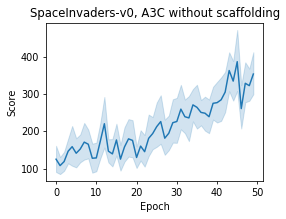

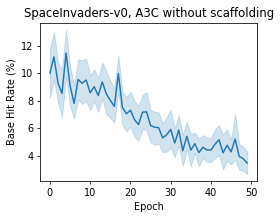

In [91]:
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)

seaborn.lineplot(x="Epoch", y="Score", data=df_all_rewards, estimator='mean', ci=95)
plt.title("SpaceInvaders-v0, A3C without scaffolding")
plt.savefig("out.png")

plt.figure(figsize=(w, h), dpi=d)
seaborn.lineplot(x="Epoch", y="Base Hit Rate (%)", data=df_base_shots, estimator='mean', ci=95)
plt.title("SpaceInvaders-v0, A3C without scaffolding")
plt.savefig("out.png")
